# **One-Time Truth Table vs Not Privacy-Preserving Computation**


In [163]:
import numpy as np
import matplotlib.pyplot as plt
import time

n is a global variable:

In [164]:
n = 2

## Dealer's Class:

In [165]:
class Dealer:
  """
    param r: number of rows for rotation of the truth table.
    param c: number of columns for rotation of the truth table.
    param truth_table: a matrix that represents the truth table of the equation.
    param m_A: the xor result of the truth table and matrix m_B.
    param m_B: a boolean random matrix of size 2^n by 2^n.
  """
  
  def __init__(self):

    self.r = np.random.randint(0,2**n)
    self.c = np.random.randint(0,2**n)

    self.truth_table = np.zeros((2**n,2**n), dtype=int)

    # Initialize the truth table
    for i in range(0,2**n):
      for j in range(0,2**n):
        if (i*j) >= 4:
          self.truth_table[i][j] = 1
        else:
          self.truth_table[i][j] = 0

    # Creating a matrix with random boolean values
    self.m_B = [[np.random.randint(0, 1) for j in range(2**n)] for i in range(2**n)]
    
    # Calculation of matrix m_A
    self.m_A = np.zeros((2**n,2**n), dtype=int)
    for i in range(0,2**n):
      for j in range(0,2**n):
        self.m_A[i][j] = np.bitwise_xor(self.truth_table[(i - self.r) % 2**n][(j - self.c) % 2**n], self.m_B[i][j])
      
  def RandA(self):
    """
      Returns:
      r: Alice's random value.
      m_A: Alice's random boolean matrix.
    """
    return self.r, self.m_A

  def RandB(self):
    """
      Returns:
      c: Bob's random value.
      m_B: Bob's random boolean matrix.
    """
    return self.c, self.m_B

## Alice's Class:

In [166]:
class Alice:
  """
    param x: Alice's input.
    param r: Alice's random value.
    param m_A: Alice's random boolean matrix.
    param u: a number that Alice computes and sends to Bob.
    param v: a number that Bob computes and Alice receives from him.
    param z_B: a boolean number that Bob sends to Alice.
  """

  def __init__(self, x, r, m_A):
    self.x = x
    self.r = r
    self.m_A = m_A
    self.u = -1
    self.v = -1
    self.z_B = -1

  def Receive(self, v, z_B):
    """
      param v: a number that Bob computes and Alice receives from him.
      param z_B: a boolean number that Bob sends to Alice.
    """
    self.v = v
    self.z_B = z_B

  def Send(self):
    """
      Returns:
      u: a number that Alice computes and sends to Bob.
    """
    u = (self.x + self.r) % 2**n
    self.u = u
    return u

  def Output(self):
    """
      Returns:
      z: Alice's output.
    """
    z = np.bitwise_xor(self.m_A[self.u][self.v], self.z_B)
    return z

## Bob's Class:

In [167]:
class Bob:
  """
    param y: Bob's input.
    param c: Bob's random value. 
    param m_B: Bob's random boolean matrix.
    param u: a number that Alice computes and Bob receives from her.
  """
  
  def __init__(self, y, c, m_B):
    self.y = y
    self.c = c
    self.m_B = m_B
    self.u = -1

  def Receive(self, u):
    """
      param u: a number that Alice computes and Bob receives from her.
    """
    self.u = u

  def Send(self):
    """
      Returns:
      v: a number that Bob computes and sends to Alice.
      z_B: a boolean number that Bob computes and sends to Alice.
    """
    v = (self.y + self.c) % 2**n
    z_B = self.m_B[self.u][v]
    return v, z_B

In [168]:
def plot(pp_time, npp_time):
  x = ['(0,0)','(0,1)','(0,2)','(0,3)','(1,0)','(1,1)','(1,2)','(1,3)','(2,0)','(2,1)','(2,2)','(2,3)','(3,0)','(3,1)','(3,2)','(3,3)']
  plt.figure(figsize=(8, 4))
  plt.scatter(x,pp_time, label='privacy-preserving', s=50, color='#00FF00', alpha=0.5)
  plt.scatter(x,npp_time, label='not privacy-preserving', s=10, color='#FF3131', alpha=1)
  plt.xlabel('input (x,a)')
  plt.ylabel('time per execution')
  plt.legend()
  
  plt.show()

In [169]:
vec_a = [0,1,2,3]
vec_x = [0,1,2,3]

## **Privacy-preserving computation:**

In [170]:
pp_z = np.zeros((2**n)*(2**n), dtype=int)
idx = 0
pp_time = np.zeros((2**n)*(2**n), dtype=float)
for i in range(len(vec_x)):
  for j in range(len(vec_a)):
    pp_time[idx] = time.time()
    
    dealer = Dealer()
    r, m_A=dealer.RandA()
    c, m_B =dealer.RandB()
    alice = Alice(x=vec_x[i], r=r, m_A=m_A)
    bob = Bob(y=vec_a[j], c=c, m_B=m_B)
    bob.Receive(alice.Send())
    v, z_B = bob.Send()
    alice.Receive(v=v,z_B=z_B)
    pp_z[idx] = alice.Output()
    pp_time[idx] = time.time() - pp_time[idx]
    idx = idx + 1

## **Not privacy-preserving computation:**

In [171]:
npp_z = np.zeros((2**n)*(2**n), dtype=int)
idx = 0
npp_time = np.zeros((2**n)*(2**n), dtype=float)
for i in range(len(vec_x)):
  for j in range(len(vec_a)):
    npp_time[idx] = time.time()
    if vec_a[j]*vec_x[i] >= 4:
      npp_z[idx] = 1
    else:
      npp_z[idx] = 0
    npp_time[idx] = time.time() - npp_time[idx]
    idx = idx + 1

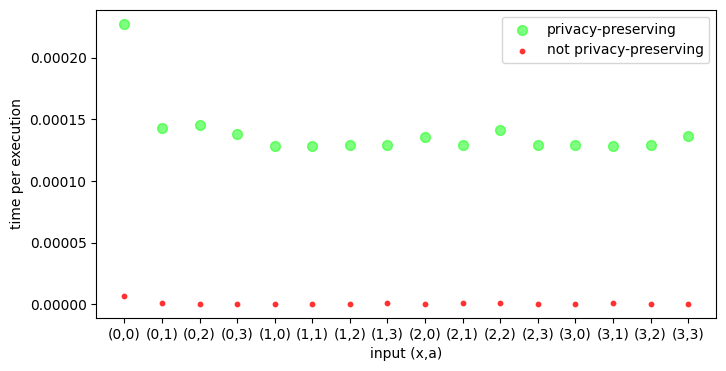

In [172]:
plot(pp_time, npp_time)